In [9]:
import pandas as pd

In [10]:
df = pd.read_csv("https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/diamonds.csv")

In [11]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [12]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [14]:
df['cut'].dtypes

dtype('O')

In [15]:
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=['Fair', 'Good', 'Ideal', 'Very Good', 'Premium'], ordered=True)
df["cut"] = df["cut"].astype(cat_type)

In [16]:
cat_type

CategoricalDtype(categories=['Fair', 'Good', 'Ideal', 'Very Good', 'Premium'], ordered=True)

In [17]:
df['cut'].dtypes

CategoricalDtype(categories=['Fair', 'Good', 'Ideal', 'Very Good', 'Premium'], ordered=True)

In [18]:
# calculate volume
df['Volume'] = df['x']*df['y']*df['z']

In [19]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,Volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [20]:
df.drop(['x','y','z'],inplace = True , axis = 1)

In [21]:
df.head()

,carat,cut,color,clarity,depth,table,price,Volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


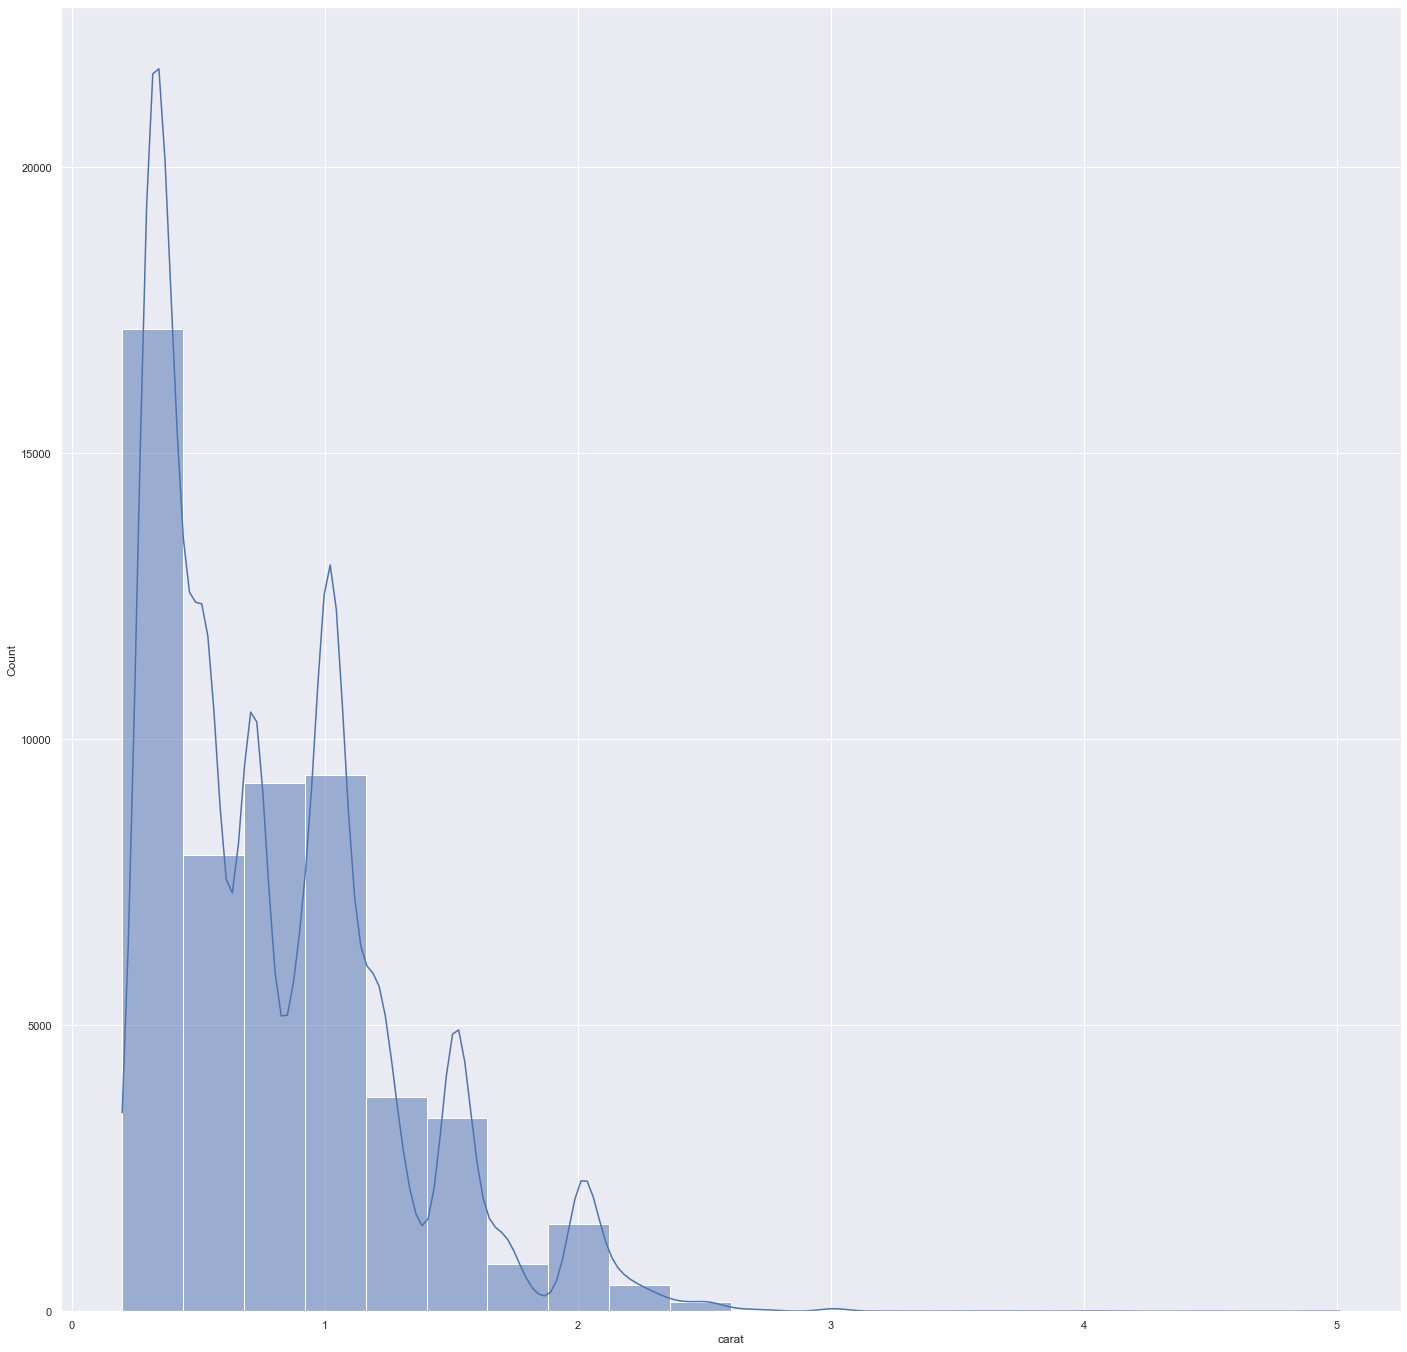

In [47]:
sns.histplot(df['carat'],bins = 20 ,kde=True)
sns.set(rc={'figure.figsize':(24,24)})

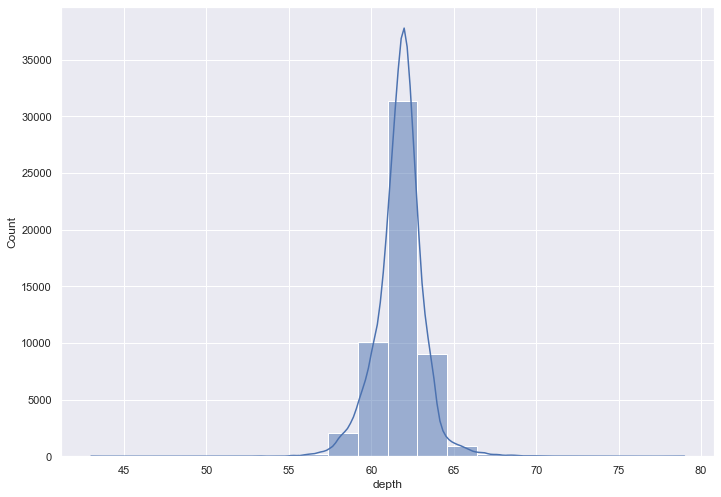

In [32]:
# plt.subplot(222)
# plt.hist(data_diam['depth'],bins=20,color='r')
# plt.xlabel('Diamond Depth')
# plt.title('Distribution by Depth')

import seaborn as sns
sns.histplot(df['depth'],bins = 20 ,kde=True)
sns.set(rc={'figure.figsize':(24,24)})

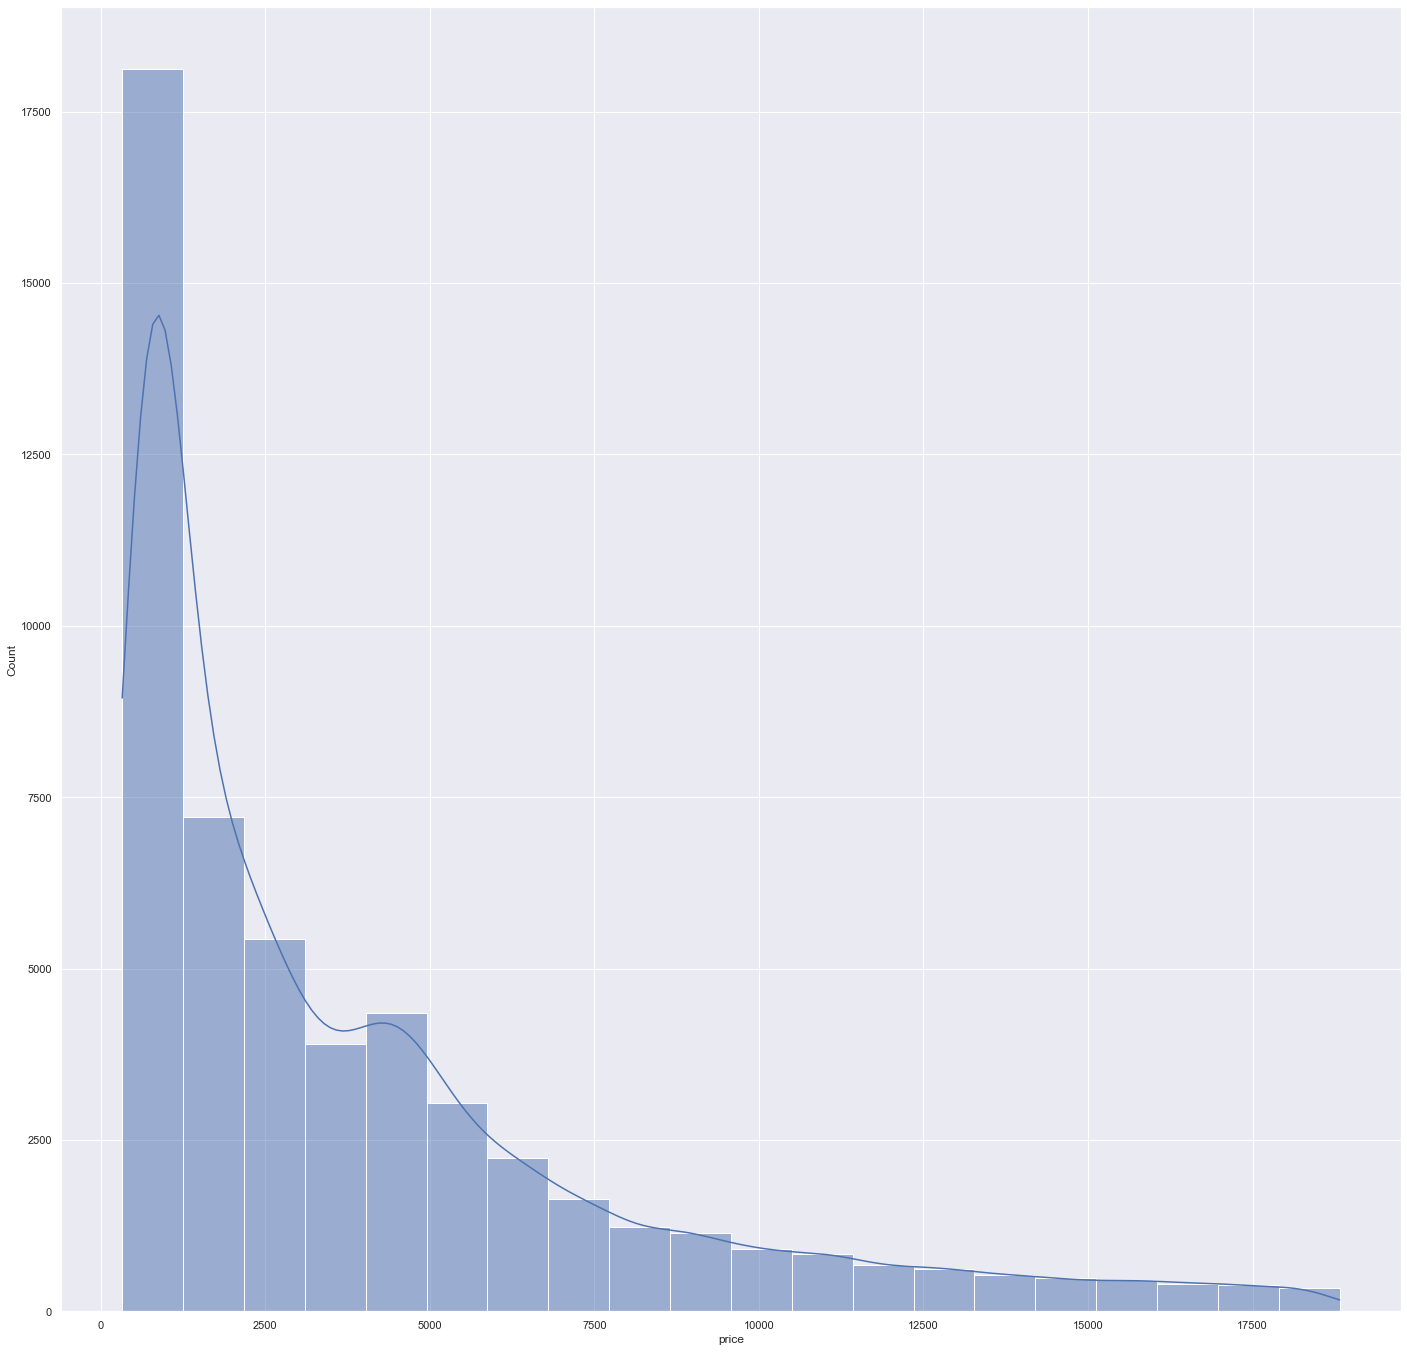

In [33]:
import seaborn as sns
sns.histplot(df['price'],bins = 20 ,kde=True)
sns.set(rc={'figure.figsize':(24,24)})

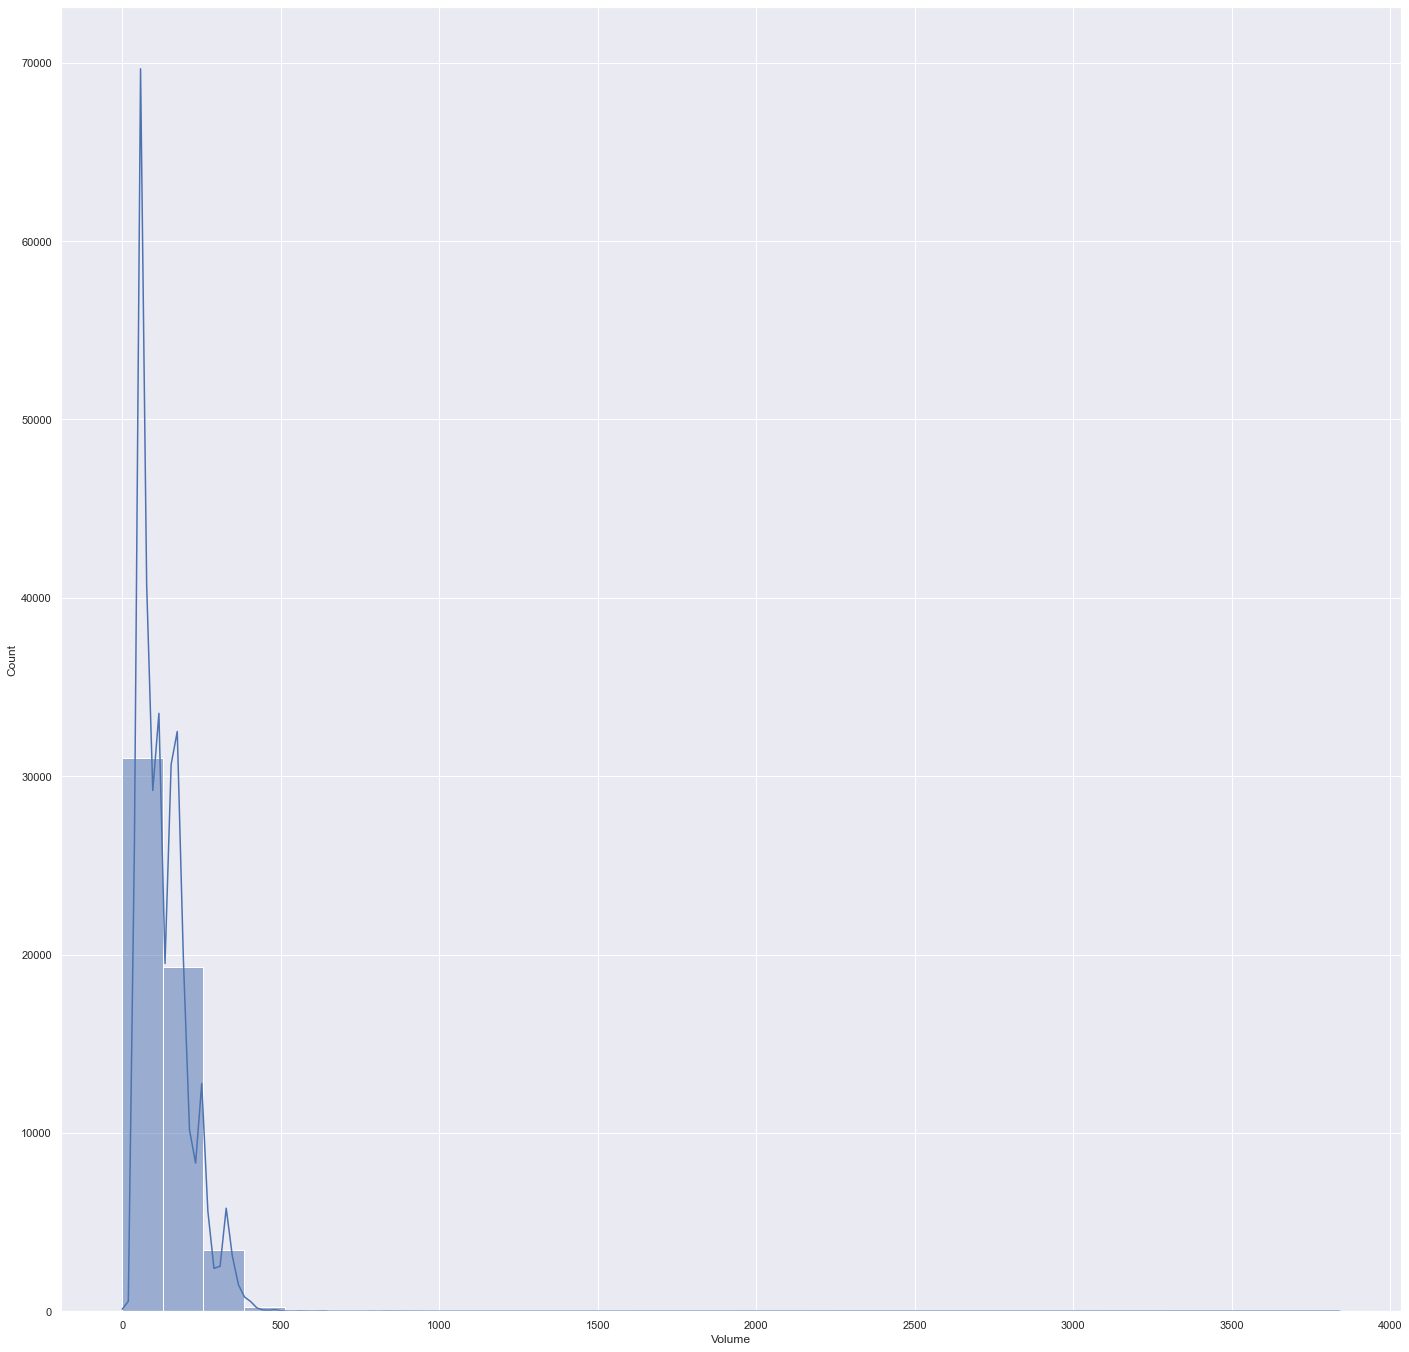

In [49]:
import seaborn as sns
sns.histplot(df['Volume'],bins = 30 ,kde=True)
sns.set(rc={'figure.figsize':(24,24)})

In [41]:
from statsmodels.miscmodels.ordinal_model import OrderedModel
mod_prob = OrderedModel(df['cut'],
                        df[['Volume', 'price', 'carat']],
                        distr='probit')

In [ ]:
# !pip install --upgrade --no-deps statsmodels 

In [42]:
res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 1.369122
         Iterations: 29
         Function evaluations: 35
         Gradient evaluations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                    cut   Log-Likelihood:                -73850.
Model:                   OrderedModel   AIC:                         1.477e+05
Method:            Maximum Likelihood   BIC:                         1.478e+05
Date:                Wed, 13 Apr 2022                                         
Time:                        12:33:26                                         
No. Observations:               53940                                         
Df Residuals:                   53933                                         
Df Model:                           7                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Volume                0.0060      0.001     10.108      0.000       0.005       0.007
price              3.511e-05   3.01e-06     11.658      0.000    2.92e-05     4.1e-05
carat                -1.1049      0.097    -11.353      0.000      -1.296      -0.914
Fair/Good            -1.8589      0.016   -119.403      0.000      -1.889      -1.828
Good/Ideal           -0.3292      0.014    -24.056      0.000      -0.356      -0.302
Ideal/Very Good       0.2053      0.006     35.080      0.000       0.194       0.217
Very Good/Premium    -0.4986      0.008    -60.605      0.000      -0.515      -0.483
=====================================================================================
"""

In [43]:
mod_prob = OrderedModel(df['cut'],
                        df[['Volume', 'price', 'carat']],
                        distr='logit')
 
res_log = mod_prob.fit(method='bfgs')
res_log.summary()

Optimization terminated successfully.
         Current function value: 1.369215
         Iterations: 36
         Function evaluations: 42
         Gradient evaluations: 42


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                    cut   Log-Likelihood:                -73855.
Model:                   OrderedModel   AIC:                         1.477e+05
Method:            Maximum Likelihood   BIC:                         1.478e+05
Date:                Wed, 13 Apr 2022                                         
Time:                        12:34:33                                         
No. Observations:               53940                                         
Df Residuals:                   53933                                         
Df Model:                           7                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Volume                0.0104      0.002      5.875      0.000       0.007       0.014
price              2.348e-05   5.31e-06      4.425      0.000    1.31e-05    3.39e-05
carat                -1.5407      0.286     -5.394      0.000      -2.100      -0.981
Fair/Good            -3.2836      0.031   -105.758      0.000      -3.344      -3.223
Good/Ideal            0.4038      0.015     27.062      0.000       0.375       0.433
Ideal/Very Good       0.7301      0.006    116.508      0.000       0.718       0.742
Very Good/Premium    -0.0055      0.008     -0.653      0.514      -0.022       0.011
=====================================================================================
"""

In [44]:
predicted = res_log.model.predict(res_log.params, exog=df[['Volume', 'price', 'carat']])
predicted

array([[0.03443606, 0.10308231, 0.42201809, 0.21495304, 0.2255105 ],
       [0.03468862, 0.10372996, 0.42298246, 0.21440769, 0.22419127],
       [0.03447851, 0.10319128, 0.42218114, 0.21486137, 0.2252877 ],
       ...,
       [0.03052062, 0.09285935, 0.40522189, 0.22335735, 0.2480408 ],
       [0.02973833, 0.0907751 , 0.40141256, 0.22500614, 0.25306787],
       [0.02970169, 0.09067712, 0.4012301 , 0.22508295, 0.25330815]])

In [45]:
predicted = res_prob.model.predict(res_prob.params, exog=df[['Volume', 'price', 'carat']])
predicted

array([[0.03245793, 0.09755853, 0.41044907, 0.22035949, 0.23917499],
       [0.0324667 , 0.09757532, 0.41047146, 0.22034902, 0.23913749],
       [0.03251004, 0.0976582 , 0.4105819 , 0.22029734, 0.23895252],
       ...,
       [0.03072479, 0.09419837, 0.4058435 , 0.22241922, 0.24681412],
       [0.03203741, 0.09675142, 0.40936546, 0.22086059, 0.24098511],
       [0.03033943, 0.09343888, 0.4047677 , 0.22287484, 0.24857915]])

In [ ]:
#https://www.statsmodels.org/devel/examples/notebooks/generated/ordinal_regression.html